In [1]:
import exp_movielens
import numpy as np
from scipy import sparse
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
Itr,Jtr,Ytr=exp_movielens.loaddata('datasets/ml-100k/ua.base')

In [3]:
Ite,Jte,Yte=exp_movielens.loaddata('datasets/ml-100k/ua.test')

In [4]:
# Size of the matrix
sz=(943,1682)

# Number of training points
M=len(Ytr)

In [5]:
# Standardize Y
yvec=Ytr/Ytr.std()

In [26]:
# Prepare index matrices
indU = sparse.coo_matrix((np.ones(M),(Itr,range(M))),shape=(sz[0],M))
indV = sparse.coo_matrix((np.ones(M),(Jtr,range(M))),shape=(sz[1],M))

90570

In [63]:
# Initialize decomposition
rr=50
U=np.random.randn(sz[0],rr)
V=np.random.randn(sz[1],rr)
Bu=np.random.randn(sz[0],1).ravel()
Bv=np.random.randn(sz[1],1).ravel()

In [64]:
# Gradient descent with L2 regularization
maxiter=1000
step=2e-3
lmd=20
for kk in range(maxiter):
    pred = (U[Itr,:]*V[Jtr,:]).sum(axis=1)+Bu[Itr]+Bv[Jtr]
    gg = (pred - yvec).reshape((M,1))
    Unew  = (1-step*lmd) * U - step * (indU*(gg * V[Jtr,:]))
    Vnew  = (1-step*lmd) * V - step * (indV*(gg * U[Itr,:]))
    Bunew = Bu - step * (indU * gg).ravel()
    Bvnew = Bv - step * (indV * gg).ravel()
    U, V=Unew, Vnew; Bu, Bv=Bunew, Bvnew
    if kk % 10 == 0:
        pred = (U[Ite,:]*V[Jte,:]).sum(axis=1)+Bu[Ite]+Bv[Jte]
        errte=np.mean((Ytr.std()*pred - Yte)**2)
        print 'kk=%d error=%g test=%g' % (kk, ((Ytr.std()*gg)**2).sum()/M, errte)

kk=0 error=80.1623 test=25.8817
kk=10 error=1.0712 test=4.17685
kk=20 error=0.804503 test=2.04404
kk=30 error=0.779396 test=1.46399
kk=40 error=0.781707 test=1.22937
kk=50 error=0.785197 test=1.11029
kk=60 error=0.786384 test=1.04184
kk=70 error=0.785862 test=0.999535
kk=80 error=0.784528 test=0.972204
kk=90 error=0.78294 test=0.954027
kk=100 error=0.781374 test=0.941693
kk=110 error=0.77994 test=0.933188
kk=120 error=0.778675 test=0.927239
kk=130 error=0.777581 test=0.923017
kk=140 error=0.776643 test=0.919975
kk=150 error=0.775844 test=0.91775
kk=160 error=0.775164 test=0.916094
kk=170 error=0.774587 test=0.914841
kk=180 error=0.774094 test=0.913877
kk=190 error=0.773673 test=0.913123
kk=200 error=0.773312 test=0.912524
kk=210 error=0.773 test=0.912041
kk=220 error=0.772729 test=0.911646
kk=230 error=0.772493 test=0.91132
kk=240 error=0.772287 test=0.911046
kk=250 error=0.772105 test=0.910816
kk=260 error=0.771944 test=0.91062
kk=270 error=0.771801 test=0.910452
kk=280 error=0.771673

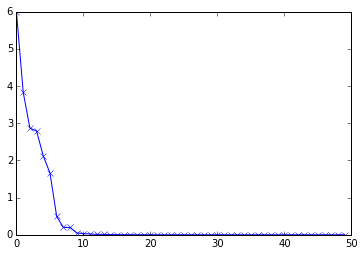

In [65]:
plt.plot(np.linalg.svd(V,compute_uv=False),'-x')

In [66]:
pred = (U[Ite,:]*V[Jte,:]).sum(axis=1)+Bu[Ite]+Bv[Jte]
np.mean((Ytr.std()*pred - Yte)**2)

0.90963478559264266

In [70]:
np.mean(np.abs(Ytr.std()*pred-Yte))

0.75059817488851055